**importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [5]:
gold=pd.read_csv('/content/gld_price_data.csv')

In [6]:
gold.head(3)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492


In [7]:
gold.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
gold.shape

(2290, 6)

In [9]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
gold.drop('Date',axis=1,inplace=True)

In [14]:
 gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [15]:
correlation = gold.corr()

<Axes: >

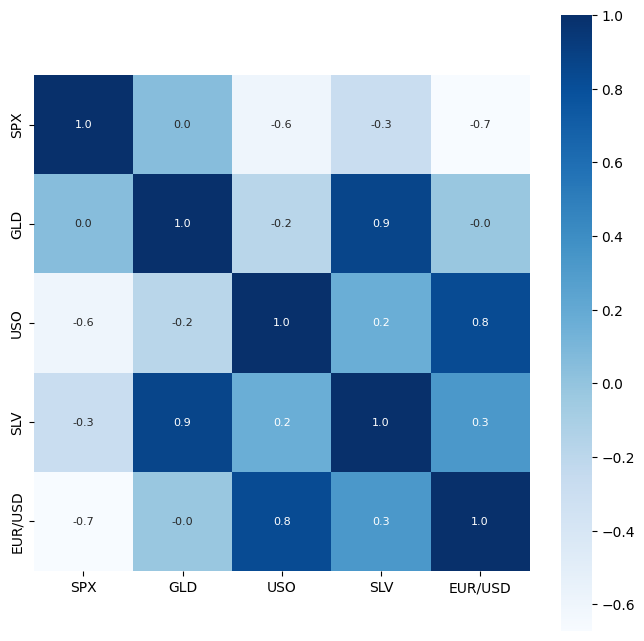

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [17]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


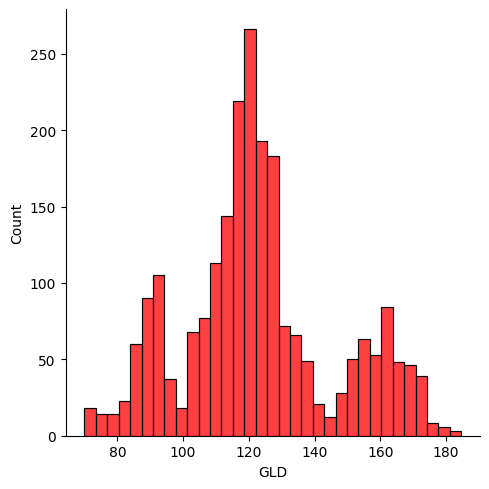

In [18]:
 sns.displot(gold['GLD'],color='red')

In [19]:
X=gold.drop(['GLD'],axis=1)
Y=gold['GLD']

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [21]:
rand_reg=RandomForestRegressor(n_estimators=100)

In [22]:
rand_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [26]:
train = rand_reg.predict(X_train)

In [28]:
error=metrics.r2_score(Y_train,train)
error

0.9984285333786109

In [34]:
Y_train=list(Y_train)

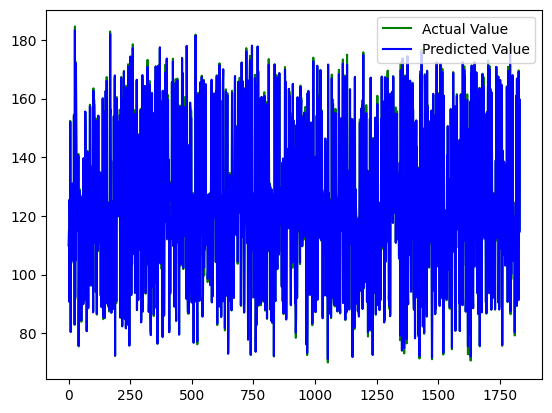

In [37]:
plt.plot(Y_train,color='green',label='Actual Value')
plt.plot(train,color='blue',label='Predicted Value')
plt.legend()
plt.show()

In [29]:
test = rand_reg.predict(X_test)

In [30]:
error=metrics.r2_score(Y_test,test)
error

0.9894069140706501

In [38]:
Y_test=list(Y_test)

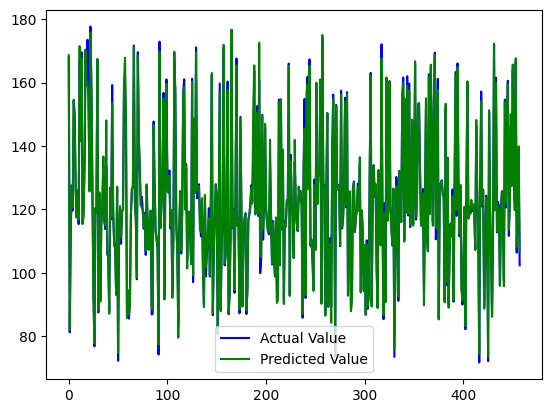

In [39]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test,color='green',label='Predicted Value')
plt.legend()
plt.show()